In [10]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, make_moons

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")), #in our case, the C is used to determine the hardness of the decision boundary and how wide the margin is
    ])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [8]:
#for non linear svm we can make a pipeline using polynomial features then use a 
#standard scaler and then apply linear svm on them
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)), #polynomial features used here is a transformer
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=7, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=7, loss='hinge'))])

ValueError: x and y must be the same size

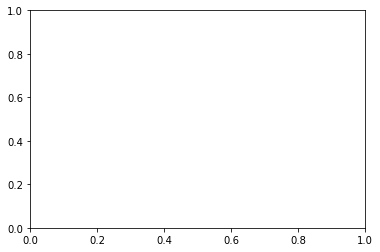

In [15]:
moons_dataset = make_moons()
import matplotlib.pyplot as plt
plt.scatter(moons_dataset[0], moons_dataset[1])

In [4]:
#we can also do something called a kernel trick to fit non-linear features more easily
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)) #here we are specifing directly that our kernel is polynomial of degree 3
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [5]:
#we use a gaussian rbf function to to model polynomial features
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001)) #the polynomial is given by an rbf guassian func
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [6]:
#svm for regression task
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [7]:
#polynomial regression using the kernel trick
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')